# Fundamentos de Programación (Python)

**Bootcamp IA**

**Actividad Semana 4**

**Regresión con múltiples variables**


*Por: Óscar Emilio Mora Navarro*


Buenos días:



,Barrio,Tamaño_m2,Habitaciones,Baños,Precio_$
0,Modelia,70,3,2,"3,000,000"
1,Ciudad Salitre,80,3,2,"3,200,000"
2,Teusaquillo,90,3,2,"3,400,000"
3,Ciudad Salitre,100,4,3,"3,600,000"
4,Modelia,120,4,3,"3,800,000"
5,Modelia,130,4,3,"4,000,000"
6,Ciudad Salitre,140,5,4,"4,200,000"
7,Ciudad Salitre,150,5,4,"4,400,000"
8,Ciudad Salitre,160,5,4,"4,600,000"
9,Ciudad Salitre,180,5,4,"4,800,000"




Estadísticas

                Barrio Tamaño_m2 Habitaciones Baños   Precio_$
count               10        10           10    10         10
unique               3                                        
top     Ciudad Salitre                                        
freq                 6                                        
mean                         122            4     3  3,900,000
std                           36            0     0    605,530
min                           70            3     2  3,000,000
25%                           92            3     2  3,450,000
50%                          125            4     3  3,900,000
75%                          147            5     4  4,350,000
max                          180            5     4  4,800,000

Estadísticas con rango, varianza y coeficiente de variación

             count       mean      std        min        25%        50%  \
Tamaño_m2       10        122       36         70         92        125   
Habitaciones    

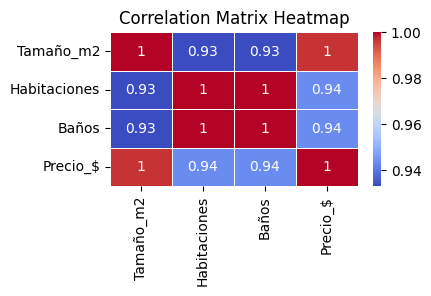

Forma de X: (10, 3)
Forma de y: (10,)
Error Cuadrático Medio (MSE): 3763555555.5555825
Raíz del Error Cuadrático Medio (RMSE): 61347.82437507937
Coeficiente de Determinación (R^2): 0.9923192743764172
Número de coeficientes: 3
Coeficientes del modelo:
Tamaño en metros cuadrados: 14799.999999999995
Número de habitaciones: 33333.33333333339
Número de baños: 33333.33333333338
Intercepto del modelo: 1845333.3333333337


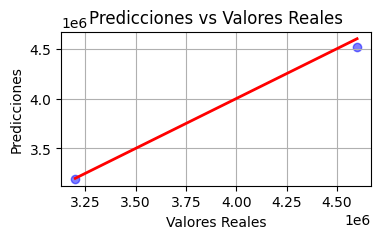

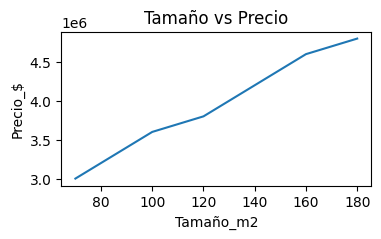

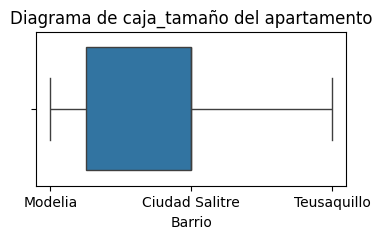

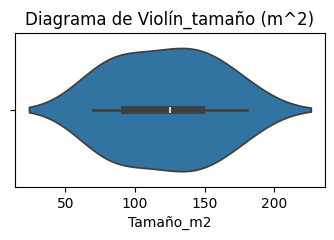

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import datetime
from pytz import timezone

# Cargar archivo 'Arriendos.xlsx'
file_name = 'Arriendos.xlsx'

# Leer el archivo Excel
df = pd.read_excel(file_name)

# Mostrar las primeras filas del DataFrame
#print(df.head())


# Saludar dependiendo de la hora (formato militar: 0-23 horas)
hora_1 = datetime.datetime.now(timezone('UTC'))
hora_actual = hora_1.astimezone(timezone('America/Bogota'))
hora = hora_actual.hour
print()
if 0 <= hora <= 12:
    print("\033[0;30m" + 'Buenos días:')
elif 12 < hora <= 18:
    print("\033[0;30m" + 'Buenas tardes:')
else:
    print("\033[0;30m" + 'Buenas noches:')


# Definir el estilo para agregar un marco alrededor de la tabla y
#formatear la columna "Precio"
styled_df = df.style.format({'Precio_$': '{:,.0f}'.format}).set_table_styles([{
    'selector': 'table',
    'props': [('border', '2px solid black')]
}])

# Mostrar el DataFrame con el estilo aplicado
print()
display(styled_df)
print()
#print("Columnas del DataFrame:", df.columns)

#Estadísticas
#A la parte de estadística se le dio formato con la ayuda de ChatGPT
#Pregunta: Cómo puedo formatear el DataFrame para mostrar sin decimales las variables numéricas
#y rellenar los valores NaN con cadena vacía en el DataFrame de estadísticas formateadas
# Descriptive stats incluyendo todas las columnas
df_stats = df.describe(include='all')

# Formatear el DataFrame para mostrar sin decimales las variables numéricas
df_stats_formatted = df_stats.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_stats_formatted[numeric_columns] = df_stats_formatted[numeric_columns].applymap(lambda x: f'{int(x):,}' if not pd.isna(x) else x)

# Rellenar los valores NaN con cadena vacía en el DataFrame de estadísticas formateadas
df_stats_formatted.fillna('', inplace=True)

print("\033[1;35m")
print("Estadísticas")
print ("\033[0;30m")
print(df_stats_formatted)

df_describe_reset = df.describe().reset_index()
df_describe_reset_transpuesto = df_describe_reset.transpose()
df_describe_transpuesto = df.describe().transpose()
df_describe_transpuesto_final = df_describe_transpuesto.copy()

# Calcular el rango, varianza y coeficiente de variación
df_describe_transpuesto_final['range'] = df_describe_transpuesto_final['max'] - df_describe_transpuesto_final['min']
df_describe_transpuesto_final['variance'] = df_describe_transpuesto_final['std'] ** 2
df_describe_transpuesto_final['variation_coef'] = df_describe_transpuesto_final['std'] / df_describe_transpuesto_final['mean']
# Seleccionar solo las columnas numéricas que no son varianza ni coeficiente de variación
numeric_columns_1 = df_describe_transpuesto_final.select_dtypes(include=[np.number]).columns
numeric_columns_to_format = numeric_columns_1.difference(['variance', 'variation_coef'])
# Aplicar el formato solo a las columnas seleccionadas
df_describe_transpuesto_final[numeric_columns_to_format] = df_describe_transpuesto_final[numeric_columns_to_format].applymap(lambda x: f'{int(x):,}' if not pd.isna(x) else x)
# Imprimir el DataFrame formateado
print("\033[1;35m")
print('Estadísticas con rango, varianza y coeficiente de variación')
print ("\033[0;30m")
print(df_describe_transpuesto_final)


# Filtrar las columnas relevantes para el análisis
df1 = df[['Tamaño_m2', 'Habitaciones', 'Baños', 'Precio_$']]

# Calcular la matriz de correlación
correlation_matrix = df1.corr()

# Imprimir la matriz de correlación
print()
print("\033[1;35m")
print("Matrix de correlación:")
print ("\033[0;30m")
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un heatmap
print()
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
print("\033[1;35m")
plt.title('Correlation Matrix Heatmap')
print ("\033[0;30m")
plt.show()

# Separar las características (variables independientes) y la variable objetivo (dependiente)
X = df[['Tamaño_m2', 'Habitaciones', 'Baños']]
y = df['Precio_$']

#print("\033[1;35m")
#plt.title('Correlación')
#print ("\033[0;30m")

# Verificar las formas de X y y
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Verificar el número de coeficientes
num_coef = len(modelo.coef_)
print(f"Número de coeficientes: {num_coef}")

if num_coef == 3:
    print("Coeficientes del modelo:")
    print(f"Tamaño en metros cuadrados: {modelo.coef_[0]}")
    print(f"Número de habitaciones: {modelo.coef_[1]}")
    print(f"Número de baños: {modelo.coef_[2]}")
else:
    print(f"Error: El modelo tiene {num_coef} coeficientes, pero se esperaban 3.")

print(f"Intercepto del modelo: {modelo.intercept_}")

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

# Mostrar otras gráficas
plt.figure(figsize=(4, 2))
ax = sns.lineplot(
    x=df.columns[1],
    y=df.columns[4],
    data=df,
)
ax.set_title('Tamaño vs Precio')  # Agregar título al gráfico
plt.show()

print()
plt.figure(figsize=(4, 2))
sns.boxplot(x=df.columns[0], data = df)
plt.title('Diagrama de caja_tamaño del apartamento')

print()
plt.figure(figsize=(4, 2))
ax = sns.violinplot(x=df.columns[1], data=df)
ax.set_title('Diagrama de Violín_tamaño (m^2)')  # Agregar título al gráfico
plt.show()

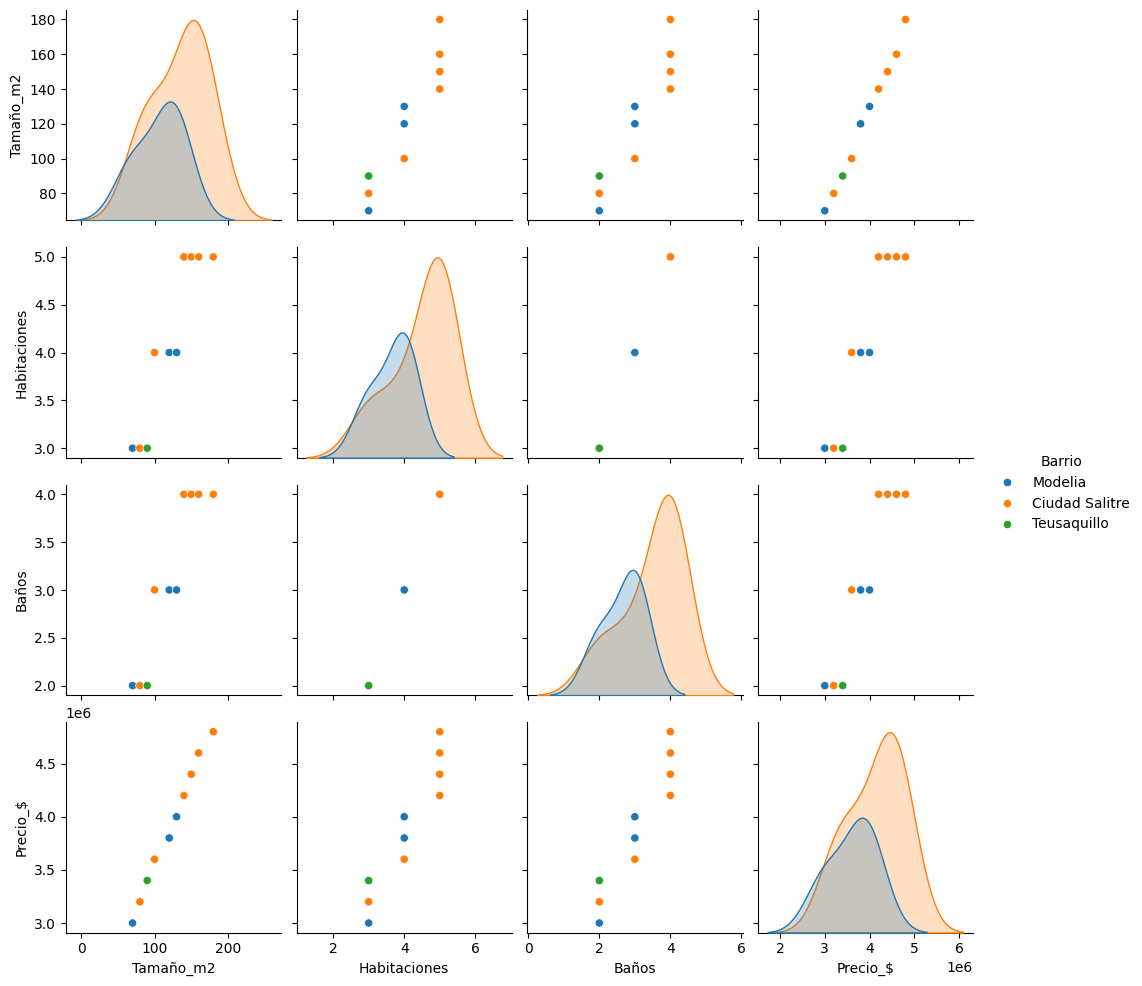

In [2]:
# visualizando los datos
sns.pairplot(df, kind= "scatter", hue="Barrio")
# en el pairplot se puede apreciar que hay correlaciones.

In [3]:
# Preprocesando el conjunto de datos
df1.isna().sum() # revisando si hay nulos

Tamaño_m2       0
Habitaciones    0
Baños           0
Precio_$        0
dtype: int64

In [4]:
# Eliminando casos imposibles con la lógica del dataset. Por ejemplo, apartamentos con área igual a cero
df1[df1["Tamaño_m2"] == 0]
# se debe mostrar una tabla con los eliminados, eliminamos empleando el index

,Tamaño_m2,Habitaciones,Baños,Precio_$


In [5]:
"""
Como los barrios son un valor categórico, y necesitamos números para entrenar
modelos, la mejor alternativa es realizar un "one-hot" encoding, que convierte los
nombres de barrios en un arreglo de 1xn
donde solo se verá un uno (True) en la columna que corresponda al nombre,
en el otro caso se tendrán ceros (False).
"""
barrios_codificados = pd.get_dummies(df.Barrio)
barrios_codificados.head()

,Ciudad Salitre,Modelia,Teusaquillo
0,False,True,False
1,True,False,False
2,False,False,True
3,True,False,False
4,False,True,False


In [6]:
# luego creamos un dataframe que contenga toda la información
df2 = pd.concat([df, barrios_codificados], axis="columns")
df2.head()
# como tenemos los nombres codificados, podemos deshacernos de la columna con los nombres que no nos sirve para el ejercicio
df3 = df2.drop(["Barrio"], axis="columns")
df3.head()

,Tamaño_m2,Habitaciones,Baños,Precio_$,Ciudad Salitre,Modelia,Teusaquillo
0,70,3,2,3000000,False,True,False
1,80,3,2,3200000,True,False,False
2,90,3,2,3400000,False,False,True
3,100,4,3,3600000,True,False,False
4,120,4,3,3800000,False,True,False


In [7]:
#Creando un modelo de regresión
#Para entrenar el modelo, se requieren datos de entrenamiento y datos de validación.
#También es necesario separar el dataframe en dos variables que sirvan
#como datos ( X ) y etiquetas ( y )

# X tendrá los datos de entrenamiento
X = df3[["Tamaño_m2", "Habitaciones", "Baños", "Ciudad Salitre", "Modelia", "Teusaquillo"]]
y = df3[["Precio_$"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (8, 6)
Tamaño de X_test= (2, 6)
Tamaño de y_train= (8, 1)
Tamaño de y_test= (2, 1)


<Axes: xlabel='Tamaño_m2', ylabel='Precio_$'>

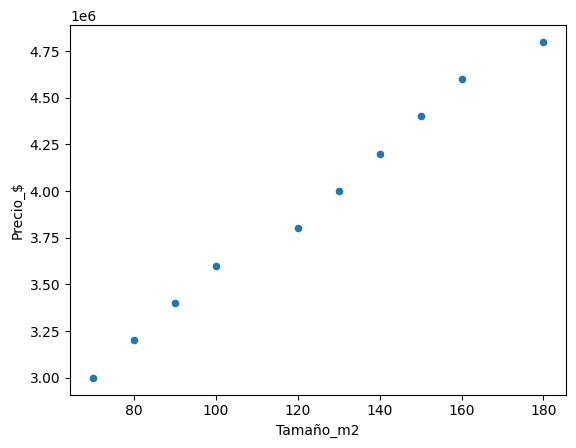

In [8]:
df3.plot.scatter('Tamaño_m2','Precio_$')

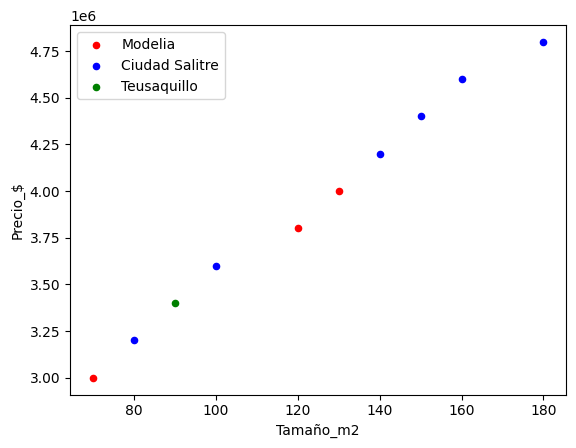

In [9]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(df2['Barrio'].unique()):
    ax = df2[df2['Barrio']==var].plot.scatter('Tamaño_m2','Precio_$',ax=ax,c=colors[i],label=var)

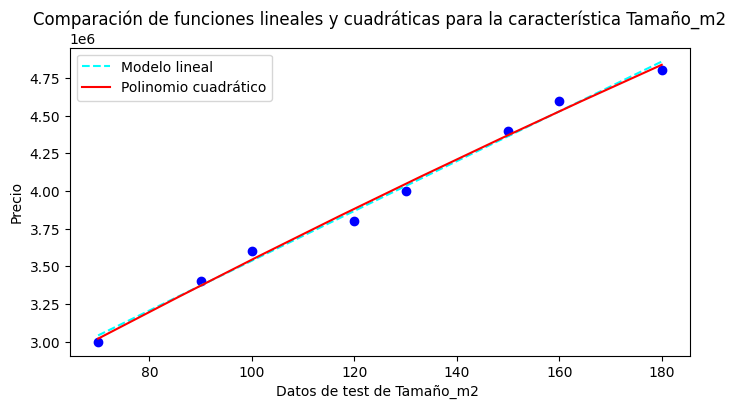

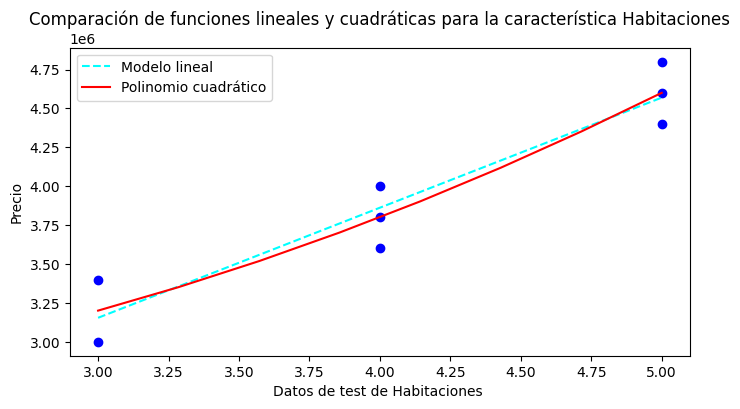

In [10]:
# Regresión polinómica (no lineal):
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # Polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # Polinomio de segundo grado (curva parabólica)
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    # Crear la figura y ajustar el tamaño
    plt.figure(figsize=(8, 4))  # Tamaño de la figura reducido a 6x4 pulgadas

    # Graficar los datos y los modelos
    plt.scatter(x_coordinates, y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s ' % feature.name)
    plt.ylabel('Precio')
    plt.legend()
    plt.title("Comparación de funciones lineales y cuadráticas para la característica %s" % feature.name)

    # Mostrar la gráfica
    plt.show()

# Llamar a la función con X_train.Tamaño_m2 y y_train
polynomial_plot(X_train.Tamaño_m2, y_train)  # Comparando modelos para el tamaño del apartamento

polynomial_plot(X_train.Habitaciones, y_train) # comparando modelos para el número de habitaciones

r2_score =  0.9962423369052837


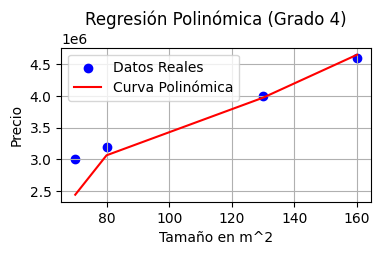

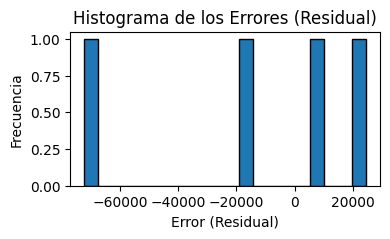

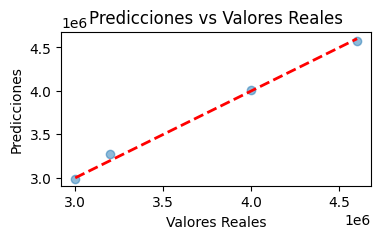

In [11]:
#Regresión polinómica utilizando Sklearn
#Emplearemos un polinomio de grado 4 para realizar la regresión.

import operator  # Importar el módulo operator

# X tendrá los datos de entrenamiento
X = df3[["Tamaño_m2", "Habitaciones", "Baños", "Ciudad Salitre", "Modelia", "Teusaquillo"]]
y = df3["Precio_$"]  # Asegurarse de que y sea una serie, no un DataFrame

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Emplear un polinomio de grado 4 para realizar la regresión
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Transformar también el conjunto de prueba

# Entrenar el modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_poly, y_train)

# Predecir valores
predictions = model.predict(X_test_poly)

# Evaluar el modelo
r2 = r2_score(y_test, predictions)
print('r2_score = ', r2)

# Gráfica polinómica para una característica 'Tamaño_m2' y 'Precio_$'
plt.figure(figsize=(4, 2))

# Para la gráfica polinómica, usamos solo una característica y su transformación polinómica
X_single_feature = df3[["Tamaño_m2"]]
y_single_feature = df3["Precio_$"]
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single_feature, y_single_feature, test_size=0.33, random_state=42)

# Transformación polinómica de grado 4
poly_single = PolynomialFeatures(degree=4)
X_train_poly_single = poly_single.fit_transform(X_train_single)
X_test_poly_single = poly_single.transform(X_test_single)

# Entrenar el modelo con una sola característica transformada
model_single = LinearRegression()
model_single.fit(X_train_poly_single, y_train_single)

# Hacer predicciones
predictions_single = model_single.predict(X_test_poly_single)

# Ordenar los valores para una mejor visualización
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test_single.values, predictions_single), key=sort_axis)
X_test_single_sorted, predictions_single_sorted = zip(*sorted_zip)

# Graficar los puntos y la curva polinómica ajustada
plt.scatter(X_test_single, y_test_single, color='blue', label='Datos Reales')
plt.plot(X_test_single_sorted, predictions_single_sorted, color='red', label='Curva Polinómica')
plt.xlabel('Tamaño en m^2')
plt.ylabel('Precio')
plt.title('Regresión Polinómica (Grado 4)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular los errores (residuales)
error = y_test - predictions

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [12]:
#Entendiendo los resultados del entrenamiento
#Al terminar el entrenamiento, tenemos que el valor de la métrica de R cuadrado en 0,83.
#Vamos a predecir los datos de prueba y validar cómo le va al modelo en comparación con las etiquetas

predictedprecio = pd.DataFrame(predictions, columns=['Predicted Precio']) # Create new dataframe of column'Predicted Weight'
actualprecio = pd.DataFrame(y_test)
actualprecio = actualprecio.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualprecio,predictedprecio],axis =1)
df_actual_vs_predicted.T

# Crear un nuevo DataFrame con precios formateados
df_actual_vs_predicted_formatted = df_actual_vs_predicted.copy()

# Formatear las columnas de precios
df_actual_vs_predicted_formatted['Precio_$'] = df_actual_vs_predicted_formatted['Precio_$'].map('${:,.2f}'.format)
df_actual_vs_predicted_formatted['Predicted Precio'] = df_actual_vs_predicted_formatted['Predicted Precio'].map('${:,.2f}'.format)

# Transponer el DataFrame y mostrarlo
print(df_actual_vs_predicted_formatted.T)

                              0              1              2              3
Precio_$          $4,600,000.00  $3,200,000.00  $4,000,000.00  $3,000,000.00
Predicted Precio  $4,575,413.48  $3,272,440.91  $4,014,491.12  $2,989,980.38


Text(0.5, 1.0, 'histograma de las diferencias')

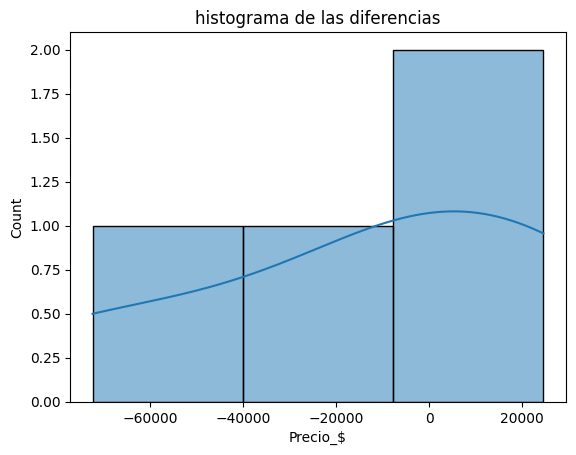

In [13]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (6,4) # Custom figure size in inches
plt.title("histograma de las diferencias")

Error Cuadrático Medio (MSE): 8362712786.828663
Raíz del Error Cuadrático Medio (RMSE): 91447.86923066422
Coeficiente de Determinación (R^2): 0.9829332392105538
Coeficiente del modelo (Log del tamaño en metros cuadrados): 1873421.6896088603
Intercepto del modelo: -5034754.537279341


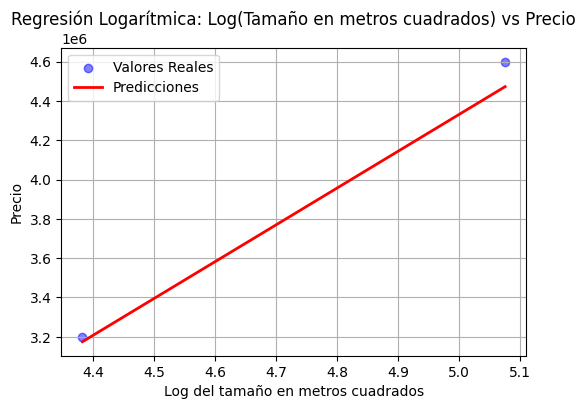

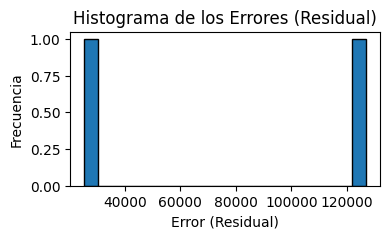

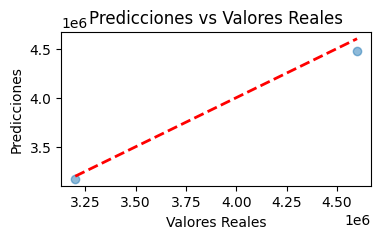

Text(0.5, 1.0, 'histograma de las diferencias')

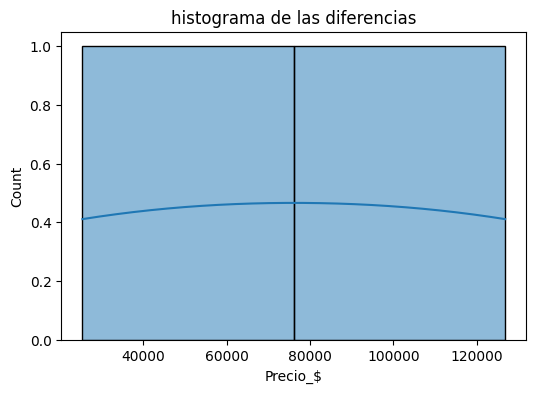

In [14]:
#Ecuación logaritmica
# Leer el archivo Excel
df4 = pd.read_excel(file_name)

# Filtrar las columnas relevantes para el análisis
df4 = df4[['Tamaño_m2', 'Precio_$']].copy()

# Aplicar la transformación logarítmica al tamaño en metros cuadrados
df4['Log_Tamaño_m2'] = np.log(df['Tamaño_m2'])

# Separar las características (variable independiente) y la variable objetivo (dependiente)
X = df4[['Log_Tamaño_m2']]
y = df4['Precio_$']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal (usaremos la transformación logarítmica)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Verificar los coeficientes
print(f"Coeficiente del modelo (Log del tamaño en metros cuadrados): {modelo.coef_[0]}")
print(f"Intercepto del modelo: {modelo.intercept_}")

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Valores Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Log del tamaño en metros cuadrados')
plt.ylabel('Precio')
plt.title('Regresión Logarítmica: Log(Tamaño en metros cuadrados) vs Precio')
plt.legend()
plt.grid(True)
plt.show()

# Calcular los errores (residuales)
error = y_test - y_pred

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (6,4) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [15]:
#Entendiendo los resultados del entrenamiento
#Al terminar el entrenamiento, tenemos que el valor de la métrica de R cuadrado en 0,83.
#Vamos a predecir los datos de prueba y validar cómo le va al modelo en comparación con las etiquetas

predictedprecio = pd.DataFrame(y_pred, columns=['Precio estimado']) # Create new dataframe of column'Predicted Weight'
actualprecio = pd.DataFrame(y_test)
actualprecio = actualprecio.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualprecio,predictedprecio],axis =1)
df_actual_vs_predicted.T

# Crear un nuevo DataFrame con precios formateados
df_actual_vs_predicted_formatted = df_actual_vs_predicted.copy()

# Formatear las columnas de precios
df_actual_vs_predicted_formatted['Precio_$'] = df_actual_vs_predicted_formatted['Precio_$'].map('${:,.2f}'.format)
df_actual_vs_predicted_formatted['Precio estimado'] = df_actual_vs_predicted_formatted['Precio estimado'].map('${:,.2f}'.format)

# Transponer el DataFrame y mostrarlo
print(df_actual_vs_predicted_formatted.T)

                             0              1
Precio_$         $4,600,000.00  $3,200,000.00
Precio estimado  $4,473,186.17  $3,174,629.20


Coeficiente de Determinación (R^2): 0.9933110367892977


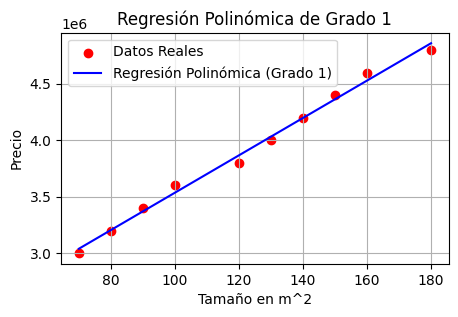

Coeficiente de Determinación (R^2): 0.993727974988087


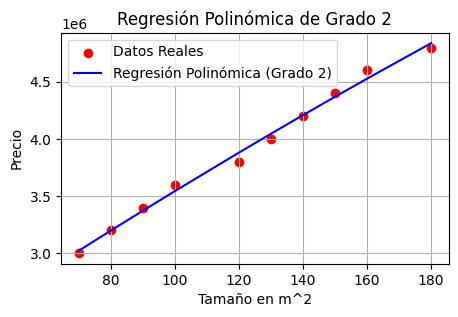

Coeficiente de Determinación (R^2): 0.9937814494398745


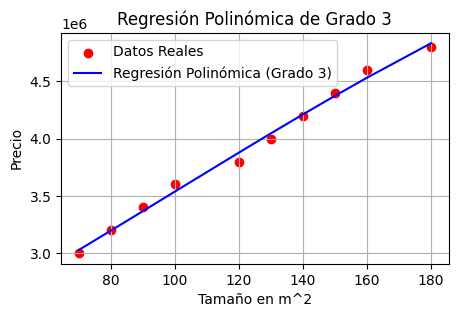

Coeficiente de Determinación (R^2): 0.9988895584259524


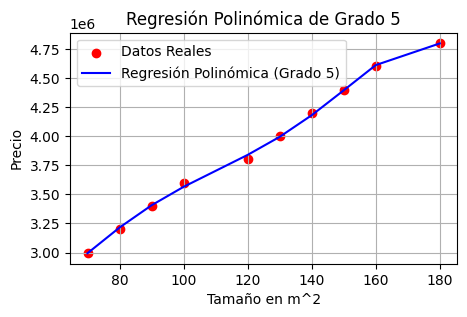

Coeficiente de Determinación (R^2): 0.9992074024940686


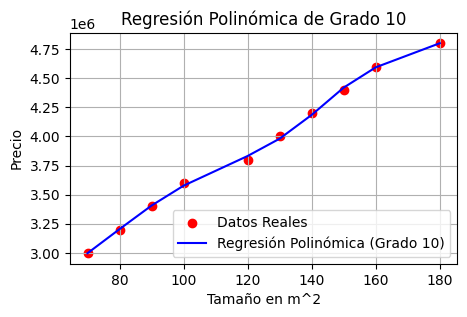

Coeficiente de Determinación (R^2): 0.9631645550763243


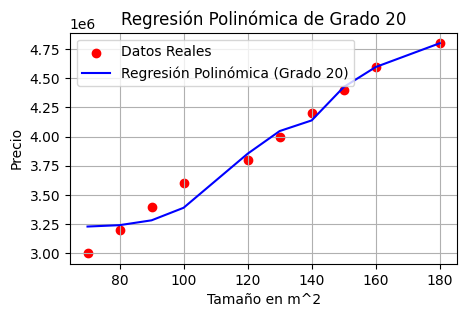

In [16]:
#Regresión polinómica
#creando un objeto para la regresión polinómica con diferentes grados

from sklearn.preprocessing import PolynomialFeatures

df5 = pd.read_excel(file_name)

# Filtrar las columnas relevantes para el análisis
df5 = df5[['Tamaño_m2', 'Precio_$']].copy()

# Separar las características (variable independiente) y la variable objetivo (dependiente)
X = df5['Tamaño_m2'].values.reshape(-1, 1)
y = df5['Precio_$'].values

def polynomial_plot_2(feature, label, degree):
    X = feature
    y = label
    # Creando un objeto para la regresión polinómica
    poly_regressor = PolynomialFeatures(degree=degree)
    poly_features = poly_regressor.fit_transform(X)

    # Ajustando el modelo de regresión lineal con características polinómicas
    model = LinearRegression()
    model.fit(poly_features, y)

    # Predicciones
    y_pred = model.predict(poly_features)

    # Calcular el R^2
    r2 = r2_score(y, y_pred)
    print(f'Coeficiente de Determinación (R^2): {r2}')

    # Visualización de los datos y el modelo polinómico ajustado
    plt.figure(figsize=(5, 3))
    plt.scatter(X, y, color='red', label='Datos Reales')
    plt.plot(X, y_pred, color='blue', label=f'Regresión Polinómica (Grado {degree})')
    plt.xlabel('Tamaño en m^2')
    plt.ylabel('Precio')
    plt.title(f'Regresión Polinómica de Grado {degree}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función con X, Y y degree=1
polynomial_plot_2(X, y, 1)

# Llamar a la función con X, Y y degree=2
polynomial_plot_2(X, y, 2)

# Llamar a la función con X, Y y degree=3
polynomial_plot_2(X, y, 3)

# Llamar a la función con X, Y y degree=5
polynomial_plot_2(X, y, 5)

# Llamar a la función con X, Y y degree=10
polynomial_plot_2(X, y, 10)

# Llamar a la función con X, Y y degree=20
polynomial_plot_2(X, y, 20)


Estadísticas




,Grados,mse,rmse,R^2
0,1,4232489795.918322,65057.588304,0.991362
1,2,4410443612.558000,66411.170842,0.990999
2,3,5095774967.411427,71384.697011,0.989600
3,5,1164416438.231171,34123.546683,0.997624
4,10,13876770680.583912,117799.705775,0.971680
5,20,57826015456307.171875,7604341.881866,-117.012276


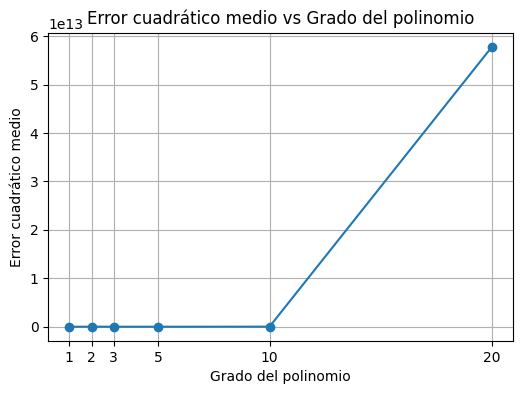

In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
degrees = [1, 2, 3, 5, 10, 20]
mse_list = []
rmse_list = []
r2_list = []


for degree in degrees:
  poly_features = PolynomialFeatures(degree=degree)
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.transform(X_test)

  model = LinearRegression()
  model.fit(X_train_poly, y_train)

  y_pred = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  rmse = mean_squared_error(y_test, y_pred)**0.5
  rmse_list.append(rmse)
  r2 = r2_score(y_test, y_pred)
  r2_list.append(r2)


data_dict = {"Grados":degrees,
             "mse":mse_list,
             "rmse":rmse_list,
             "R^2":r2_list} #,

# Turn a dictionary into a dataframe
df6 = pd.DataFrame(data_dict)

# Seleccionar solo las columnas numéricas diferente a R^2
#numeric_columns_1 = df6.select_dtypes(include=[np.number]).columns
#numeric_columns_to_format = numeric_columns_1.difference(['R^2'])
# Aplicar el formato solo a las columnas seleccionadas
#df6[numeric_columns_to_format] = df6[numeric_columns_to_format].applymap(lambda x: f'{int(x):,}' if not pd.isna(x) else x)

# Definir el estilo para agregar un marco alrededor de la tabla
styled_df6 = df6.style.set_table_styles([{
    'selector': 'table',
    'props': [('border', '2px solid black')]
}])

# Imprimir el DataFrame formateado
print("\033[1;35m")
print('Estadísticas')
print ("\033[0;30m")
print()
display(styled_df6)

# Graficar el error cuadrático medio vs el grado del polinomio
plt.figure(figsize=(6, 4))
plt.plot(degrees, mse_list, marker='o')
plt.title('Error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()

Coeficiente 'a': 1907327.2350081624
Coeficiente 'b': -5180963.550660226
La ecuación es: Y =  1907327.2350081624 log(X) +  -5180963.550660226
El coeficiente de determinación R^2 es: 0.9823181605043978
Interpretación:
El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.
El coeficiente 'b' representa el intercepto de la curva logarítmica.


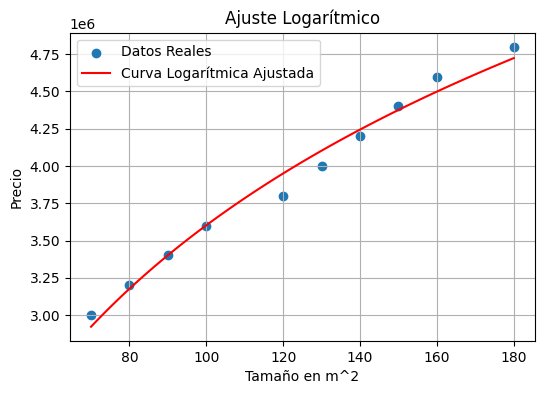

In [18]:
#Ecuación logarítmica

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

df6 = pd.read_excel(file_name)

# Filtrar las columnas relevantes para el análisis
df6 = df6[['Tamaño_m2', 'Precio_$']].copy()

X = df6['Tamaño_m2']
y = df6['Precio_$']

def logarithmic_function(x, a, b):
	return a * np.log(x) + b

# Ajustar la curva logarítmica a los datos
params, _ = curve_fit(logarithmic_function, X, y)
a, b = params

# Calcular las predicciones para los datos originales
y_pred = logarithmic_function(X, a, b)

# Calcular el R^2
r2 = r2_score(y, y_pred)

# Imprimir los coeficientes
print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)
print("La ecuación es: Y = ", a, "log(X) + ", b)
print(f"El coeficiente de determinación R^2 es: {r2}")
print("Interpretación:")
print("El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.")
print("El coeficiente 'b' representa el intercepto de la curva logarítmica.")


# Crear puntos para la curva ajustada
x_fit = np.linspace(min(X), max(X), 100)
y_fit = logarithmic_function(x_fit, a, b)

# Visualizar los datos y la curva ajustada
plt.scatter(X, y, label='Datos Reales')
plt.plot(x_fit, y_fit, color='red', label='Curva Logarítmica Ajustada')
plt.xlabel('Tamaño en m^2')
plt.ylabel('Precio')
plt.title('Ajuste Logarítmico')
plt.legend()
plt.grid(True)
plt.show()

Precisión del modelo de regresión logística: 0.865
Precisión: 0.8717626262626262
Recuperación o sensibilidad (recall): 0.865
Puntuación o medida F1 (F1-score): 0.8646924983104305



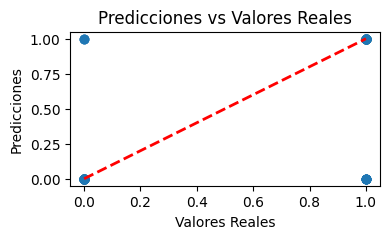


Precisión del modelo de regresión logística de sklearn: 0.88


In [19]:
# Ecuación Logística (clasificación binaria)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Cálculo del gradiente
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Actualización de parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)


# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred = model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)
print()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()


#Comparación con modelo de regresión logística de sklearn
# Crear y entrenar modelo de regresión logística de sklearn
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predecir en conjunto de prueba
sklearn_y_pred = sklearn_model.predict(X_test)

# Calcular precisión
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print()
print("Precisión del modelo de regresión logística de sklearn:", sklearn_accuracy)

Matriz de confusión (manual):
[[90  7]
 [20 83]]
TN: 90
TP: 83
FP: 7
FN: 20
accuracy (manual): 0.865
Precisión (manual): 0.9222222222222223
Sensibilidad (manual): 0.8058252427184466
Especificidad (manual): 0.9278350515463918
F1-score (manual): 0.8601036269430052

Matriz de confusión (sklearn):
[[90  7]
 [20 83]]
Clases únicas en y_test: [0 1]
Clases únicas en y_pred: [0. 1.]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        97
           1       0.92      0.81      0.86       103

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200



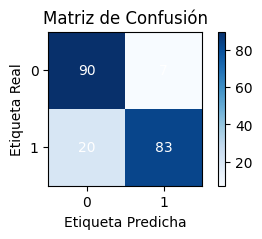


Cálculo utilizando librerias
TP: 83
TN: 90
FP: 7
FN: 20
Precisión (sklearn): 0.865
Sensibilidad (sklearn): 0.865
Especificidad (sklearn): 0.9278350515463918


In [20]:
# Cálculo de la matriz de confusión
# De manera manual

import numpy as np

# Calcular la matriz de confusión y extraer TP, TN, FP, FN de forma manual
# Verdaderos Positivos (TP), Verdaderos Negativos (TN),
# Falsos Positivos (FP) y Falsos Negativos (FN)

# Inicializar contadores
TP = 0
TN = 0
FP = 0
FN = 0

for yt, yp in zip(y_test, y_pred):
    if yt == 1 and yp == 1:
        TP += 1
    elif yt == 0 and yp == 0:
        TN += 1
    elif yt == 0 and yp == 1:
        FP += 1
    elif yt == 1 and yp == 0:
        FN += 1

# Crear matriz de confusión manual
confusion_matrix_manual = np.array([[TN, FP], [FN, TP]])

# Calcular accuracy, precisión, sensibilidad y especificidad de forma manual
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision_manual = TP / (TP + FP) if (TP + FP) > 0 else 0
sensibilidad_manual = TP / (TP + FN) if (TP + FN) > 0 else 0
especificidad_manual = TN / (TN + FP) if (TN + FP) > 0 else 0

# Calcular el F1-score de manera manual
f1_score_manual = 2 * (precision_manual * sensibilidad_manual) / (precision_manual + sensibilidad_manual) if (precision_manual + sensibilidad_manual) > 0 else 0

print("Matriz de confusión (manual):")
print(confusion_matrix_manual)
print("TN:", TN)
print("TP:", TP)
print("FP:", FP)
print("FN:", FN)
print("accuracy (manual):", accuracy)
print("Precisión (manual):", precision_manual)
print("Sensibilidad (manual):", sensibilidad_manual)
print("Especificidad (manual):", especificidad_manual)
print("F1-score (manual):", f1_score_manual)
print()

# Matriz de confusión utilizando librerias
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Obtener matriz de confusión utilizando sklearn
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión para inspección
print("Matriz de confusión (sklearn):")
print(conf_matrix)

# Imprimir las clases únicas presentes en y_test
print("Clases únicas en y_test:", np.unique(y_test))

# Imprimir las clases únicas presentes en y_pred
print("Clases únicas en y_pred:", np.unique(y_pred))

# Calcular métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
for i in range(len(np.unique(y_test))):
    for j in range(len(np.unique(y_test))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
plt.show()

# Analizar casos de error
#error_indices = np.where(y_test != y_pred)[0]
#print("Índices de casos erróneos:", error_indices)

# Imprimir algunas instancias de error
#for idx in error_indices[:min(5, len(error_indices))]:
#    print("Instancia:", X_test[idx])
#    print("Etiqueta Real:", y_test[idx])
#    print("Etiqueta Predicha:", y_pred[idx])
#    print()

#num_classes = len(np.unique(y_test))
#print("Número de clases:", num_classes)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print()
print("Cálculo utilizando librerias")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

# Calcular precisión, sensibilidad y especificidad utilizando sklearn
precision_sklearn = precision_score(y_test, y_pred, average='micro')
sensibilidad_sklearn = recall_score(y_test, y_pred, average='micro')  # Recall es lo mismo que sensibilidad
# Calcular especificidad utilizando sklearn
especificidad_sklearn = TN / (TN + FP) if (TN + FP) > 0 else 0

print("Precisión (sklearn):", precision_sklearn)
print("Sensibilidad (sklearn):", sensibilidad_sklearn)
print("Especificidad (sklearn):", especificidad_sklearn)




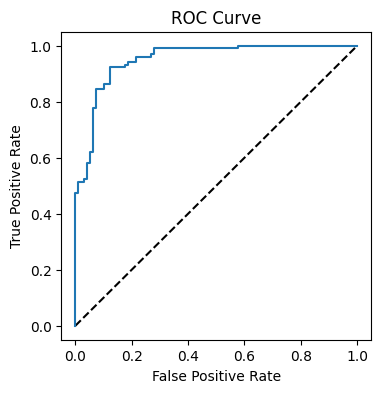

auc: 0.9498548693824442


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(4, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC score
auc = roc_auc_score(y_test,y_scores[:,1])
print('auc:',auc)
